# Analise do aluno Kleber

In [435]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import unicodedata

In [436]:
df = pd.read_csv("data/dataset_kleber.csv")

df["horas_sono"] = pd.to_numeric(df["horas_sono"],errors="coerce")
df["tempo_redes"] = pd.to_numeric(df["tempo_redes"],errors="coerce")
df["nivel_concentracao"] = pd.to_numeric(df["nivel_concentracao"],errors="coerce")
df["passos_dia"] = pd.to_numeric(df["passos_dia"],errors="coerce")

print(df.info())

df = df.dropna(subset=["horas_celular","horas_sono","tempo_redes","tempo_estudo","nivel_concentracao","passos_dia"])

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  200 non-null    int64  
 1   horas_celular       200 non-null    int64  
 2   horas_sono          199 non-null    float64
 3   tempo_redes         199 non-null    float64
 4   tempo_estudo        200 non-null    int64  
 5   nivel_concentracao  199 non-null    float64
 6   passos_dia          200 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 11.1 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 199
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  197 non-null    int64  
 1   horas_celular       197 non-null    int64  
 2   horas_sono          197 non-null    float64
 3   tempo_redes         197 non-null    float64
 4   t

---------------------------------------------------------------------------------

## Horas de sono e rendimento escolar

In [437]:
contagem_horas_sono = df["horas_sono"].value_counts()
print(contagem_horas_sono)

horas_sono
9.0    39
5.0    36
4.0    36
7.0    32
6.0    29
8.0    25
Name: count, dtype: int64


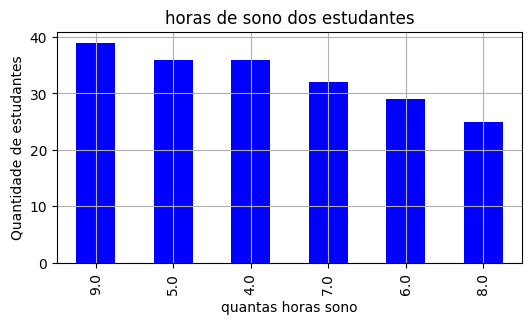

In [438]:
# Grafico 1 horas de sono do estudante

plt.figure(figsize=(6, 3))
contagem_horas_sono.plot(kind="bar", color="blue", grid=True )
plt.title("horas de sono dos estudantes")
plt.xlabel("quantas horas sono")
plt.ylabel("Quantidade de estudantes")
plt.show()

Pelos dados de horas de sono do Kleber, dá pra ver que não existe um padrão muito certinho. Tem dias que o sono é bom, chegando a 8 ou até 9 horas, mas em muitos outros dias o descanso fica curto, com 4 ou 5 horas de sono.

Isso mostra que o sono acaba variando bastante, o que pode influenciar no cansaço e na concentração ao longo do dia. Mesmo sendo só de uma pessoa, os números se repetem bastante e ajudam a gente a entender melhor como o descanso interfere na rotina, servindo tanto pra autoconhecimento quanto pra estudo.

---------------------------------------------------------------------------------

## Uso excessivo de celular e vício em rede

In [439]:
### contagem de horas de celular
df["dif_rede_celular"] = df["tempo_redes"] - df["horas_celular"]

contagem_dif_rede_celular = df["dif_rede_celular"].value_counts()
print(contagem_dif_rede_celular)

dif_rede_celular
-5.0     32
-3.0     22
-7.0     18
 1.0     17
-1.0     14
 3.0     14
 0.0     13
-6.0     13
-4.0     12
-2.0     12
-9.0      8
-8.0      8
-10.0     4
 2.0      4
-11.0     4
 4.0      2
Name: count, dtype: int64


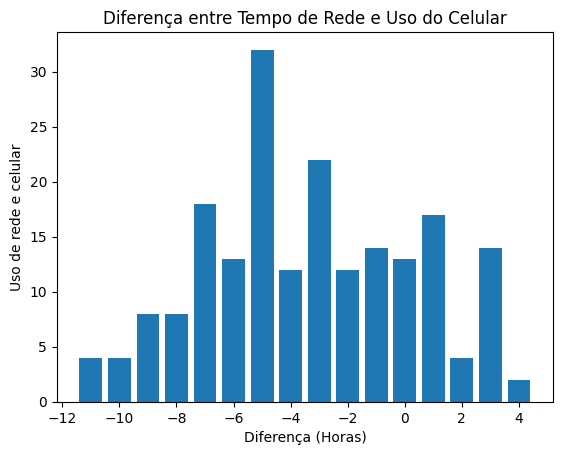

In [440]:
### grafico 2 : diferenca entre uso de rede e uso do celular


contagem = df["dif_rede_celular"].value_counts().sort_index()

plt.figure()
plt.bar(contagem.index, contagem.values)
plt.xlabel("Diferença (Horas)")
plt.ylabel("Uso de rede e celular")
plt.title("Diferença entre Tempo de Rede e Uso do Celular")
plt.show()


A análise da diferença entre o tempo de uso da rede e o uso do celular do aluno Kleber mostra que, na maioria das vezes, o celular acaba sendo mais usado. Isso pode acabar atrapalhando a atenção e a concentração no dia a dia.

Mesmo sendo dados de uma pessoa só, dá pra perceber um padrão que se repete, o que ajuda a gente a tirar umas conclusões importantes sobre o comportamento. Isso mostra como a análise dos dados pode ajudar no autoconhecimento e também servir como aprendizado pra estudo e pesquisa.

---------------------------------------------------------------------------------

## Analise de concentração e rendimento escolar

In [441]:
df["nivel_concentracao"] = pd.to_numeric(df["nivel_concentracao"], errors="coerce")
print(df["nivel_concentracao"].value_counts())

nivel_concentracao
4.0    45
1.0    43
2.0    38
5.0    36
3.0    35
Name: count, dtype: int64


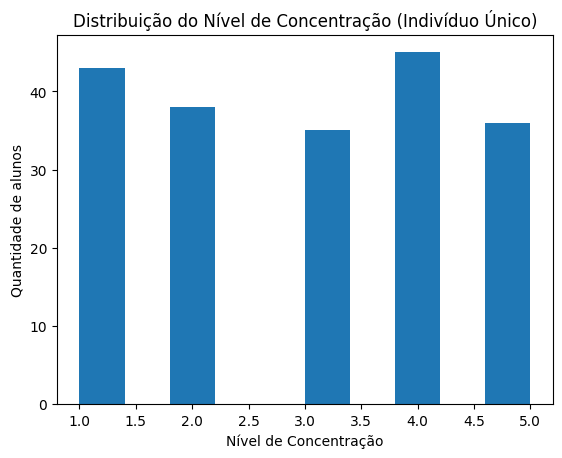

In [442]:
plt.figure()
plt.hist(df["nivel_concentracao"].dropna())
plt.xlabel("Nível de Concentração")
plt.ylabel("Quantidade de alunos")
plt.title("Distribuição do Nível de Concentração (Indivíduo Único)")
plt.show()


Pelos dados dá pra ver que a concentração do Kleber varia bastante, não ficando sempre no mesmo nível. O nível 4 aparece mais, mostrando que muitas vezes o foco até é bom, mas o nível 1 também surge bastante, indicando dias de pouca concentração, possivelmente por cansaço, sono ruim ou uso excessivo do celular.

No geral, a concentração tem altos e baixos, o que é comum na rotina do dia a dia e mostra a importância de cuidar melhor do descanso e do uso da tecnologia.

------------------------------------------------------------------------------------------

## Analise se passos dos estudantes

### Pergunta : Quantos passos os estudantes dá por dia em média?

In [443]:
contagem_passos_dia = df["passos_dia"].value_counts()
print(contagem_passos_dia)

passos_dia
11168    2
8736     1
13483    1
14794    1
8174     1
        ..
11417    1
14029    1
5195     1
2857     1
13469    1
Name: count, Length: 196, dtype: int64


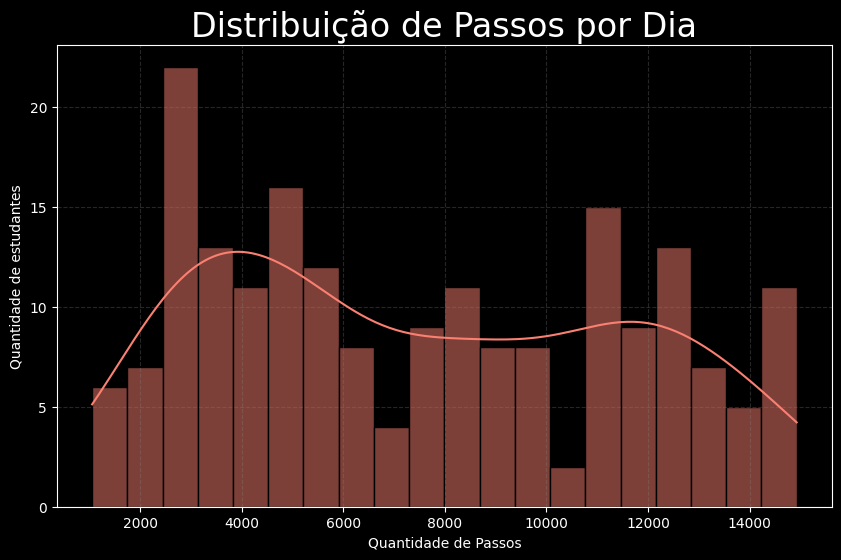

In [444]:
plt.figure(figsize=(10, 6) )


ax = plt.gca()

# 🎨 FUNDO PRETO
plt.gca().set_facecolor('black')      # fundo do gráfico
plt.gcf().set_facecolor('black')  



sns.histplot(data=df, x='passos_dia', bins=20, kde=True, color='salmon')
plt.title('Distribuição de Passos por Dia', fontsize=24, color='white' )
plt.xlabel('Quantidade de Passos', color='white')
plt.ylabel('Quantidade de estudantes', color='white')


# 🔢 NÚMEROS DOS EIXOS (AQUI ESTÁ O SEGREDO)
plt.tick_params(axis='both', colors='white')

# 🔲 BORDAS (O QUADRADO DO GRÁFICO)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')

# 🧱 GRID (LINHAS INTERNAS)
ax.grid(True, color='gray', linestyle='--', alpha=0.3)
plt.show()

------------------------------------------------------------------------------------------

## Exemplo de grafico I

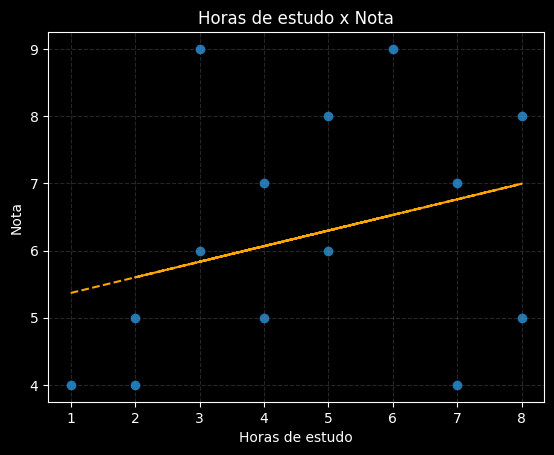

In [445]:
horas_estudo=[1,2,3,4,5,6,2,4,5,7,8,3,7,8]
notas = [4,5,6,7,8,9,4,5,6,7,8,9,4,5]
plt.scatter(horas_estudo,notas)

coeficientes = np.polyfit(horas_estudo,notas,1)
funcao_tendencia = np.poly1d(coeficientes)


ax = plt.gca()
# 🎨 FUNDO PRETO
plt.gca().set_facecolor('black')      # fundo do gráfico
plt.gcf().set_facecolor('black')  



plt.plot(horas_estudo,funcao_tendencia(horas_estudo), color="orange", linestyle="--", label="Tendência")
plt.title("Horas de estudo x Nota", color='white')
plt.xlabel("Horas de estudo", color='white')
plt.ylabel("Nota", color='white')


# 🔢 NÚMEROS DOS EIXOS (AQUI ESTÁ O SEGREDO)
plt.tick_params(axis='both', colors='white')

# 🔲 BORDAS (O QUADRADO DO GRÁFICO)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')

# 🧱 GRID (LINHAS INTERNAS)
ax.grid(True, color='gray', linestyle='--', alpha=0.3)

plt.show()

-------------------------------------------------------------------------------------------------------------

## Exemplo de grafico II

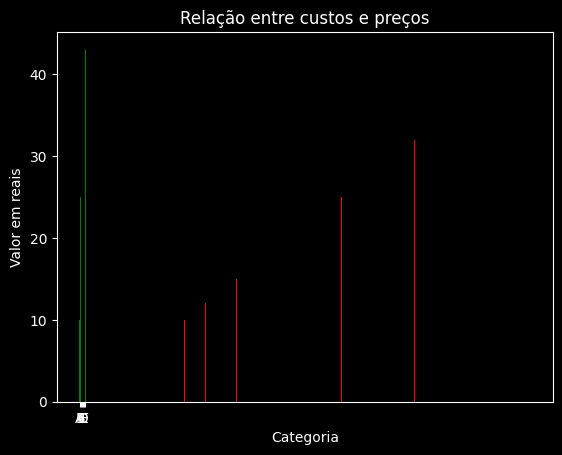

In [446]:
categorias = ["A", "B", "C", "D", "E", "F"]
precos = [10,25,15,32,12,43]
custos = [100,250,150,320,120,430]



ax = plt.gca()
# 🎨 FUNDO PRETO
plt.gca().set_facecolor('black')      # fundo do gráfico
plt.gcf().set_facecolor('black')  



plt.bar(categorias,precos, color="green")
plt.bar(custos,precos, color="red")
plt.title ("Relação entre custos e preços", color="white")
plt.xlabel("Categoria", color="white")
plt.ylabel ("Valor em reais", color="white")



# 🔢 NÚMEROS DOS EIXOS (AQUI ESTÁ O SEGREDO)
plt.tick_params(axis='both', colors='white')

# 🔲 BORDAS (O QUADRADO DO GRÁFICO)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')




plt.show ()

## Grafico de exemplo III

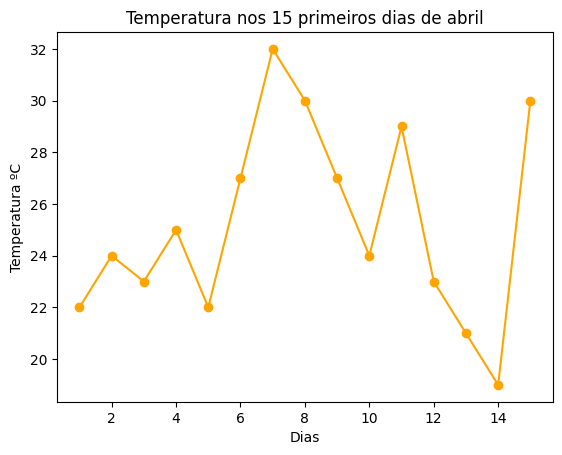

In [447]:
dias = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
temperatura = [22,24,23,25,22,27,32,30,27,24,29,23,21,19,30]

plt.plot(dias,temperatura, marker="o", color="orange")
plt.title("Temperatura nos 15 primeiros dias de abril")
plt.xlabel("Dias")
plt.ylabel("Temperatura ºC")
plt.show()

"tempo_estudo","nivel_concentracao"

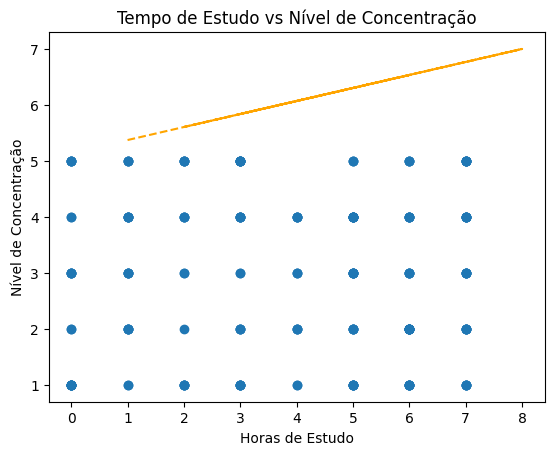

In [448]:
plt.figure()
plt.scatter(df["tempo_estudo"], df["nivel_concentracao"])


coeficientes = np.polyfit(horas_estudo,notas,1)
funcao_tendencia = np.poly1d(coeficientes)

plt.plot(horas_estudo,funcao_tendencia(horas_estudo), color="orange", linestyle="--", label="Tendência")

plt.title("Tempo de Estudo vs Nível de Concentração")
plt.xlabel("Horas de Estudo")
plt.ylabel("Nível de Concentração")
plt.show()


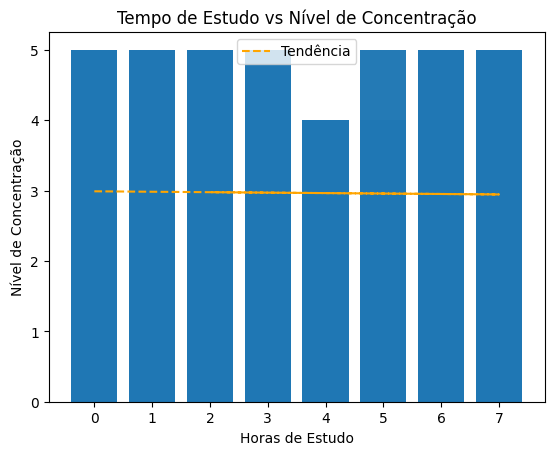

In [449]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()

plt.bar(df["tempo_estudo"],df["nivel_concentracao"],alpha=0.7
)

coeficientes = np.polyfit(df["tempo_estudo"],df["nivel_concentracao"],1
)

funcao_tendencia = np.poly1d(coeficientes)

plt.plot(df["tempo_estudo"],funcao_tendencia(df["tempo_estudo"]),color="orange",linestyle="--",label="Tendência"
)

# ✍️ Textos
plt.title("Tempo de Estudo vs Nível de Concentração")
plt.xlabel("Horas de Estudo")
plt.ylabel("Nível de Concentração")
plt.legend()

plt.show()
